In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets, linear_model, metrics
import seaborn as sns
plt.style.use('seaborn')
%matplotlib notebook
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from datetime import datetime
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(1)

,Month,Year,InternetQuantity,InternetSales,InternetProfit,Reseller Units,Reseller Sales,Reseller Profit
0,December,2010,14,43421,17849,820,489329,17033


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             38 non-null     object
 1   Year              38 non-null     int64 
 2   InternetQuantity  38 non-null     int64 
 3   InternetSales     38 non-null     int64 
 4   InternetProfit    38 non-null     int64 
 5   Reseller Units    38 non-null     int64 
 6   Reseller Sales    38 non-null     int64 
 7   Reseller Profit   38 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.5+ KB


In [49]:
X = np.array([df['Reseller Units']]).reshape((-1,1))
y = np.array([df['Reseller Sales']]).reshape((-1,1))

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [51]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
y_pred_ = np.reshape(y_pred,len(y_pred))
y_test_ = np.reshape(y_test,len(y_test))
X_test_ = np.reshape(X_test,len(X_test))

In [54]:
reseller_verify = pd.DataFrame({'X': X_test_, 'Actual':y_test_,'Predicted': y_pred_})

In [55]:
reseller_verify

,X,Actual,Predicted
0,0,0,5.903681e+05
1,10574,3510949,3.496696e+06
2,2754,2010618,1.347322e+06
3,7943,2880753,2.773550e+06
4,15139,4212972,4.751414e+06
5,7457,2282116,2.639970e+06
6,5400,1865278,2.074591e+06
7,10264,3416235,3.411491e+06


In [56]:
regressor.score(X_train,y_train)

0.7450588762770162

In [57]:
X_test

array([[    0],
       [10574],
       [ 2754],
       [ 7943],
       [15139],
       [ 7457],
       [ 5400],
       [10264]], dtype=int64)

<IPython.core.display.Javascript object>


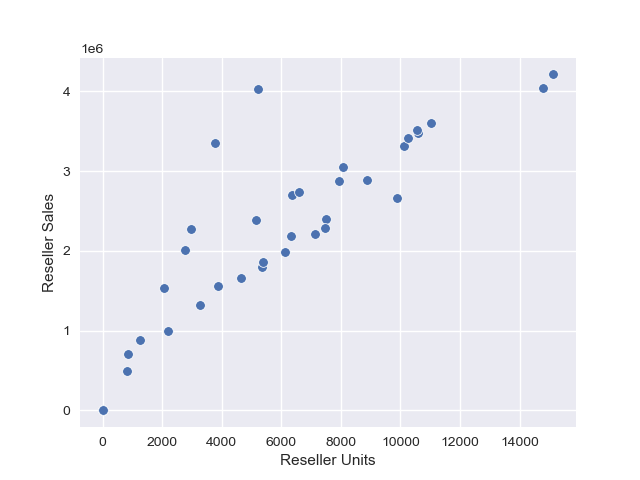

In [59]:
sns.scatterplot(x = df['Reseller Units'],y=df['Reseller Sales']);

In [61]:
def predictor(nums):
    try:
        pred = regressor.predict(np.array([nums]).reshape((-1,1)))
    except:
        print("Exception thrown, incorrect data type entered.")
    return pred

In [69]:
what_if = [400,500,600,700,800]
result = predictor(what_if)

In [70]:
what_if = np.reshape(what_if,len(what_if))
result = np.reshape(result,len(result))

In [71]:
predicted_df = pd.DataFrame({'What-if': what_if,'Prediction': result})
predicted_df

,What-if,Prediction
0,400,700310.523446
1,500,727796.128531
2,600,755281.733617
3,700,782767.338702
4,800,810252.943788


<IPython.core.display.Javascript object>


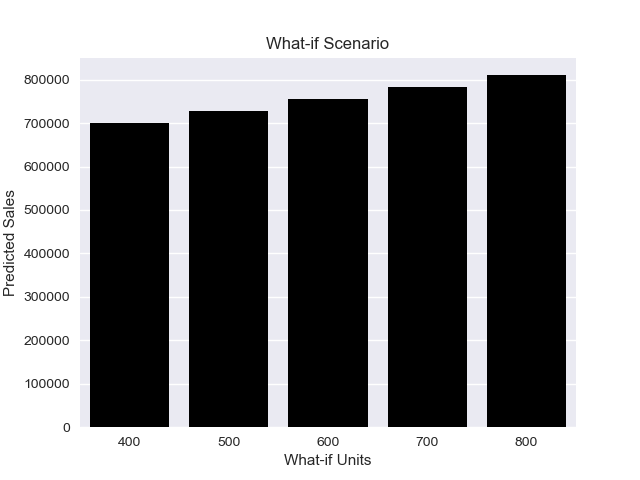

In [76]:
sns.barplot(x = what_if,y=result,color='black')
plt.ylabel('Predicted Sales')
plt.xlabel('What-if Units')
plt.title('What-if Scenario');